In [1]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
##original_data####

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:/Users/RAHUL/Downloads/WA_Fn-UseC_-Marketing-Campaign-Plan_-GroceryS (4).csv")

In [5]:
df.head()

,storeid,HealthyStore,StoreSize,StoreLayout,customerID,gender,WhoShoppingFor,Vegetarian,ShoppingStyle,CouponUser,week,CouponSequence,CarryOver,CouponValue,AmountSpent
0,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,1,"2,4,1,3",0,05 percent,135.24
1,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,2,"2,4,1,3",2,25 percent,128.65
2,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,3,"2,4,1,3",4,00 No value,112.86
3,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,4,"2,4,1,3",1,15 percent,130.14
4,1,Regular store,Medium,No emphasis,9245-DEZSB,Male,Self and family,No,Weekly; similar items,From mailings,1,"4,3,2,1",0,25 percent,155.61


In [6]:
data =pd.get_dummies(data=df, columns=['StoreLayout','StoreSize','customerID','ShoppingStyle','WhoShoppingFor','CouponValue','CouponSequence','HealthyStore'])

In [7]:
data

,storeid,gender,Vegetarian,CouponUser,week,CarryOver,AmountSpent,StoreLayout_Emphasizes bakery,StoreLayout_Emphasizes deli,StoreLayout_Emphasizes produce,...,CouponValue_00 No value,CouponValue_05 percent,CouponValue_15 percent,CouponValue_25 percent,"CouponSequence_1,2,3,4","CouponSequence_2,4,1,3","CouponSequence_3,1,4,2","CouponSequence_4,3,2,1",HealthyStore_Marketed as health food store,HealthyStore_Regular store
0,1,Male,No,From newspaper,1,0,135.24,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,Male,No,From newspaper,2,2,128.65,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,1,Male,No,From newspaper,3,4,112.86,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,1,Male,No,From newspaper,4,1,130.14,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,1,Male,No,From mailings,1,0,155.61,0,0,0,...,0,0,0,1,0,0,0,1,0,1
5,1,Male,No,From mailings,2,4,140.74,0,0,0,...,0,0,1,0,0,0,0,1,0,1
6,1,Male,No,From mailings,3,3,123.53,0,0,0,...,0,1,0,0,0,0,0,1,0,1
7,1,Male,No,From mailings,4,2,130.53,0,0,0,...,1,0,0,0,0,0,0,1,0,1
8,1,Male,No,From newspaper,1,0,190.83,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9,1,Male,No,From newspaper,2,1,0.00,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [8]:
CouponUser = {'From newspaper': 0,'From mailings': 1 , 'No' : 2, 'From both': 3} 

In [9]:
data.CouponUser = [CouponUser[item] for item in data.CouponUser] 
print(data) 

      storeid  gender Vegetarian  CouponUser  week  CarryOver  AmountSpent  \
0           1    Male         No           0     1          0       135.24   
1           1    Male         No           0     2          2       128.65   
2           1    Male         No           0     3          4       112.86   
3           1    Male         No           0     4          1       130.14   
4           1    Male         No           1     1          0       155.61   
5           1    Male         No           1     2          4       140.74   
6           1    Male         No           1     3          3       123.53   
7           1    Male         No           1     4          2       130.53   
8           1    Male         No           0     1          0       190.83   
9           1    Male         No           0     2          1         0.00   
10          1    Male         No           0     3          2       216.26   
11          1    Male         No           0     4          3   

In [10]:
gender ={'Male': 1,'Female': 0}
Vegetarian ={'Yes': 1,'No': 0}
#HealthyStore = {'Regular store': 0,'Marketed as health food store': 1}
#StoreLayout = {'No emphasis':0,'Emphasizes deli':1,'Emphasizes bakery': 2,'Emphasizes produce': 3}
#StoreSize = {'Small': 0,'Medium':1,'Large':1}


In [11]:
"""
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Regular store', 0], ['Marketed as health food store', 1]]
enc.fit(X)
"""

"\nfrom sklearn.preprocessing import OneHotEncoder\nenc = OneHotEncoder(handle_unknown='ignore')\nX = [['Regular store', 0], ['Marketed as health food store', 1]]\nenc.fit(X)\n"

In [12]:
data.gender = [gender[item] for item in data.gender] 
data.Vegetarian = [Vegetarian[item] for item in data.Vegetarian] 
#data.HealthyStore = [HealthyStore[item] for item in data.HealthyStore] 

In [13]:
data = data.dropna()

In [14]:
cols=list(data.columns)

In [15]:
cols.remove('CouponUser')

In [16]:
X = data[cols]

In [17]:
y = data.CouponUser

In [18]:
print(len(y),len(X))

1496 1496


In [26]:
y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

#splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=0)

In [27]:
# classifier
from sklearn.svm import LinearSVC
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
accuracy = clf.score(X_test,y_test)
rf_prediction =clf.predict(X_test)

In [28]:
accuracy

0.2388663967611336

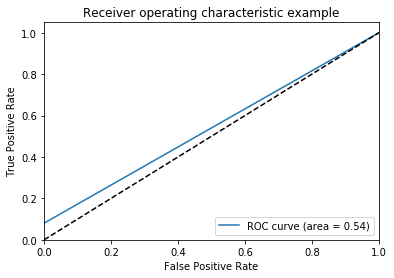

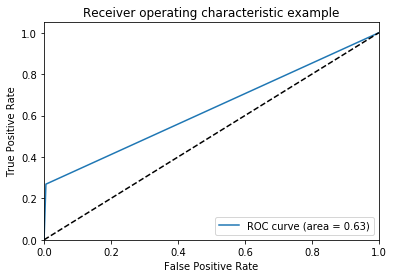

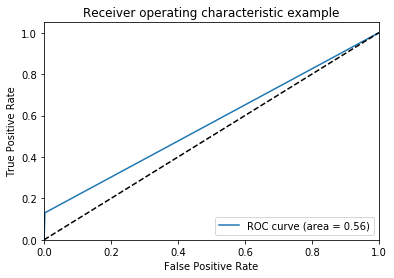

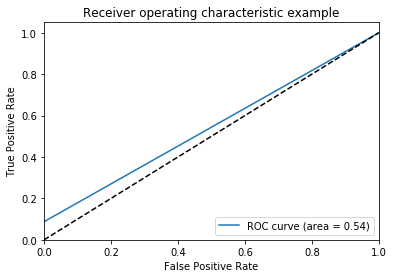

In [22]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], rf_prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()